In [4]:
from sklearn.datasets import make_regression as mr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mr?

Signature: mr(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
Docstring:
Generate a random regression problem.

The input set can either be well conditioned (by default) or have a low
rank-fat tail singular profile. See :func:`make_low_rank_matrix` for
more details.

The output is generated by applying a (potentially biased) random linear
regression model with `n_informative` nonzero regressors to the previously
generated input and some gaussian centered noise with some adjustable
scale.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int, optional (default=100)
    The number of samples.

n_features : int, optional (default=100)
    The number of features.

n_informative : int, optional (default=10)
    The number of informative features, i.e., the number of features used
    to build the linear model used to generate the o

In [80]:
X, y, coef = mr(n_features=5, noise=5, random_state=42, coef=True)

In [81]:
coef

array([60.57748194, 98.65152488, 64.59172413, 57.07783047, 35.60967259])

In [48]:
y.shape

(100,)

In [12]:
X[0]

array([0.93128012])

In [11]:
y.shape

(100,)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

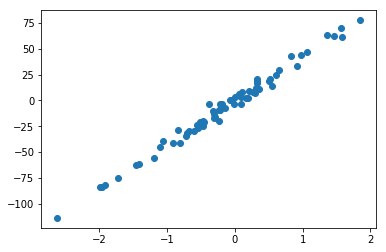

In [17]:
plt.scatter(X_train, y_train)

In [25]:
model = LinearRegression?

Init signature: LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
Docstring:     
Ordinary least squares Linear Regression.

Parameters
----------
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False``.

copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, optional, default 1
    The number of jobs to use for the computation.
    If -1 all CPUs

In [27]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
model.coef_, model.intercept_

(array([42.84588804]), -0.26194113093984495)

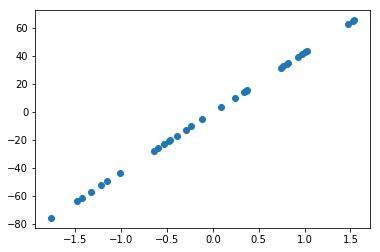

In [24]:
plt.scatter(X_test, model.predict(X_test))

In [61]:
class LinearRegressionCustom:
    
    def __init__(self, lr=0.5, max_iters=100):
        self.lr = lr
        self.max_iters = max_iters
        
    def fit(self, X, y):
        self.__X = X
        self.__y = y
        
        self.coef_ = np.array([np.random.random() for i in range(X.shape[1])])
        self.intercept_ = np.random.random()
        
        for _ in range(self.max_iters):
            self.gradient_decend()
        
    def gradient_decend(self):
        delta_coef, delta_inter = self.gradient()
        
        self.coef_ += delta_coef
        self.intercept_ += delta_inter
        
    def gradient(self):
        X, y = self.__X, self.__y
        y_predict = np.sum(self.coef_*X, axis=1) + self.intercept_
        z = (y_predict - y)
        return -2*self.lr*(np.mean(z*np.sum(X, axis=1))), -2*np.mean(z)*self.lr

In [83]:
model = LinearRegressionCustom(0.05, 100)

In [84]:
model.fit(X_train, y_train)

In [85]:
model.coef_

array([59.44088041, 59.16345333, 59.70610571, 59.53999247, 59.19236321])